In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
101,Data Analyst,Data Analyst,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-20 13:15:45,True,False,Singapore,None,NaN,NaN,Moovaz,[sql],{'programming': ['sql']}
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']..."


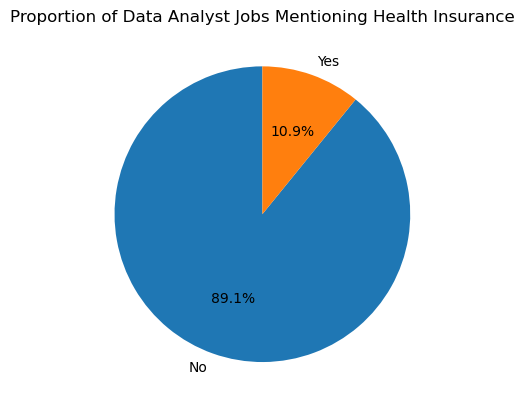

In [11]:
# Create a pie chart to show the proportion of job postings that mention health insurance for Data Analyst roles only:
# Create a new DataFrame called df_DA that only gets Data Analyst roles.
# Then count the number of data analyst roles that mention or not mention health insurance by using the job_health_insurance column.
# Plot this using plt.pie(), setting labels parameter to ['No', 'Yes'], startangle to 90, and format values to display similarly to 23.1%.
# Set the title to 'Proportion of Data Analyst Jobs Mentioning Health Insurance'.

df_DA = df[df['job_title'] == 'Data Analyst'].copy()
health_insurance_counts = df_DA['job_health_insurance'].value_counts()
health_insurance_counts.plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%',  labels = ['No', 'Yes'])
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.ylabel('')
plt.show()

Text(0.5, 1.0, '[Job Schedule Full-time vs. Part-time')

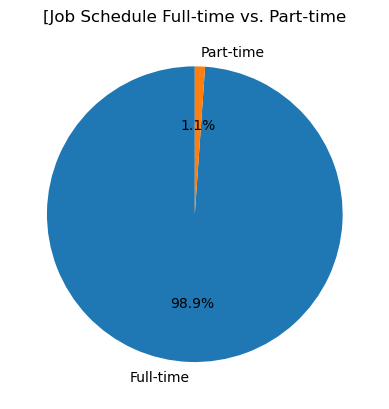

In [ ]:
# Create a pie chart showing the count of job postings per job schedule types (for only jobs that are either 'Full-time' and 'Part-time') in the DataFrame.
# Create a DataFrame to filter out these job_schedule_type called df_ft_pt.
# Plot this using plt.pie(), setting labels parameter to the index, startangle to 90, and format values to display similarly to 23.1%.
# Add a title 'Job Schedule Full-time vs. Part-time'.

df_ft_pt = df[df['job_schedule_type'].isin(['Full-time', 'Part-time'])].copy()
schedule_counts = df_ft_pt['job_schedule_type'].value_counts()
plt.pie(schedule_counts, startangle = 90, autopct = '%1.1f%%', labels=schedule_counts.index)
plt.title('[Job Schedule Full-time vs. Part-time')



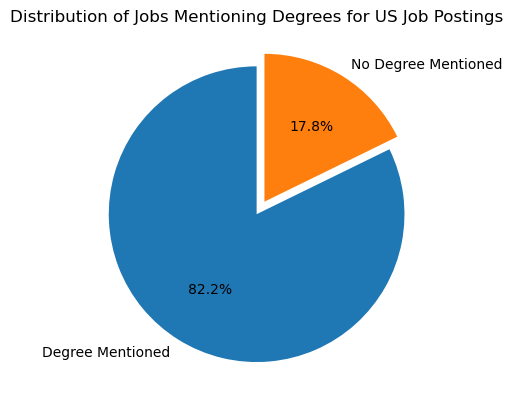

In [22]:
# Create a pie chart to show the distribution of job postings that mention a degree in the job posting versus those that do not
# Only get job postings located in the US, create a new DataFrame with this filtered data called df_US.
# Use the job_no_degree_mention column for this purpose.
# Customize the pie chart by exploding the slice for jobs that do not mention a degree. (Use the explode parameter set to (0, 0.1) inside of plt.pie())
# Set the chart title as 'Distribution of Jobs Mentioning Degrees for US Job Postings'.

df_US = df[df['job_country'] == 'United States'].copy()
degree_counts = df_US['job_no_degree_mention'].value_counts()

plt.pie(degree_counts, startangle = 90, autopct = '%1.1f%%', labels=['Degree Mentioned', 'No Degree Mentioned'], explode=(0, 0.1)) 
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()